In [2]:
from occultation_detector.simulator import Simulator
from occultation_detector.plotter import plot_normalized_intensity
import numpy as np

In [3]:
s=Simulator()
s.run()

In [5]:
time_serie,labels=s.simulate_circle_lightcurve(3000,45,0,0,0)

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99999999, 1.00000001, 0.99999999,
        1.00000001, 0.99999998, 1.00000002, 0.99999997, 1.00000005,
        0.99999993, 0.99999998, 1.00000121, 1.00000259, 1.00000424,
        1.00000126, 1.00000369, 1.00002228, 1.00000091, 0.99999398,
        1.00004909, 1.00002487, 1.00001365, 1.00002577, 1.00002236,
        1.00004052, 1.00005737, 1.00009373, 1.00014967, 1.00016763,
        1.00032581, 1.00048136, 1.00047195, 1.00673504, 0.97951054,
        0.91436608, 0.84552441, 0.84906648, 0.8465426 , 0.845964  ,
        0.91353482, 0.97951939, 1.00686363, 1.00055991, 1.00037028,
        1.00034179, 1.00016278, 1.00012534, 1.00010227, 1.00005527,
        1.00002873, 1.00003978, 1.00002865, 1.0000338 , 1.00002259,
        1.00002699, 0.99999832, 1.00001363, 1.00001619, 1.00000429,
        1.00000127, 1.0000021 , 1.00000126, 1.00

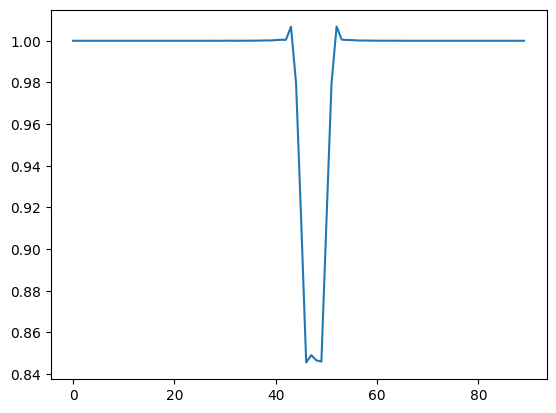

In [7]:
import matplotlib.pyplot as p
p.plot(time_serie[0]);

In [10]:
%run model_toolkit.py
from joblib import load
import numpy as np
from sklearn.model_selection import train_test_split
import random

X, y = load('taosii_circle_simulation_diffraction_profile.joblib')
X_train, X_test, y_train, y_test = train_test_split(X, discretize([500,1000,2000,5000,10000], y[:,0]))

In [15]:
y[:,0]

array([ 1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,  1000.,
        1000.,  1000.,  2000.,  2000.,  2000.,  2000.,  2000.,  2000.,
        2000.,  2000.,  2000.,  2000.,  3000.,  3000.,  3000.,  3000.,
        3000.,  3000.,  3000.,  3000.,  3000.,  3000.,  4000.,  4000.,
        4000.,  4000.,  4000.,  4000.,  4000.,  4000.,  4000.,  4000.,
        5000.,  5000.,  5000.,  5000.,  5000.,  5000.,  5000.,  5000.,
        5000.,  5000.,  6000.,  6000.,  6000.,  6000.,  6000.,  6000.,
        6000.,  6000.,  6000.,  6000.,  7000.,  7000.,  7000.,  7000.,
        7000.,  7000.,  7000.,  7000.,  7000.,  7000.,  8000.,  8000.,
        8000.,  8000.,  8000.,  8000.,  8000.,  8000.,  8000.,  8000.,
        9000.,  9000.,  9000.,  9000.,  9000.,  9000.,  9000.,  9000.,
        9000.,  9000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000., 10000.])

In [16]:
from aeon.classification.convolution_based import RocketClassifier
from sklearn.metrics import accuracy_score

rocket = RocketClassifier(num_kernels=12000)
rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [21]:
rocket.predict([np.array(time_serie)])

array([1.])